# Road to Bayesian Nonparametrics

## Imports

In [258]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Beta Distribution

The Beta Distribution with parameters $\theta = (\alpha,\beta) = (1,1)$

In [7]:
# Set parameters
a = 1
b = 1

# The value of the pdf at x = 0.8
p1 = stats.beta.pdf(0.8,a,b)

print('If X ~ Beta(1,1), then P(0.8) = {}'.format(p1))

If X ~ Beta(1,1), then P(0.8) = 1.0


In fact, Beta(1,1) is the uniform distribution, so all values are 1:

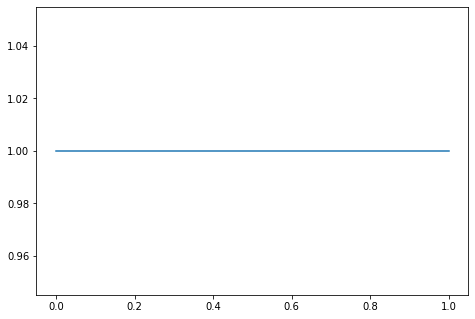

In [70]:
# Set parameters
a = 1
b = 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# To store the values
p = []

# Loop through the entire range from 0 to 1
x = np.linspace(0,1,100)
for i in x:
    p.append(stats.beta.pdf(i,a,b))

a=ax.plot(x,p)

Let's create a function of the above to loop through the values of a Beta distribution given a and b

In [71]:
def plotBeta(a,b):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    p=[]
    x = np.linspace(0,1,100)
    for i in x:
        p.append(stats.beta.pdf(i,a,b))
    
    ax.set_xlabel('x')
    ax.set_ylabel('P')
    ax.set_title('Beta({},{})'.format(a,b))
    a=ax.plot(x,p)

Let's plot the Beta distribution for different values of $\theta$

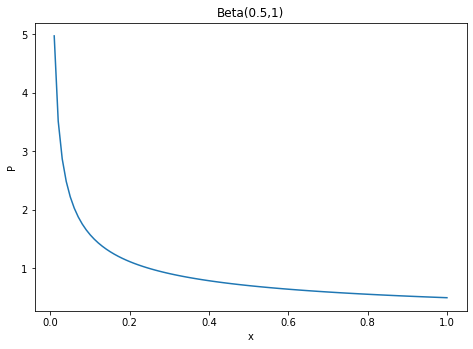

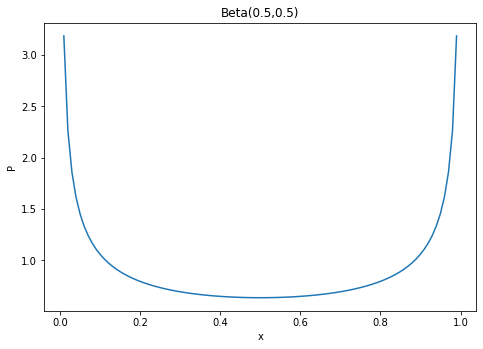

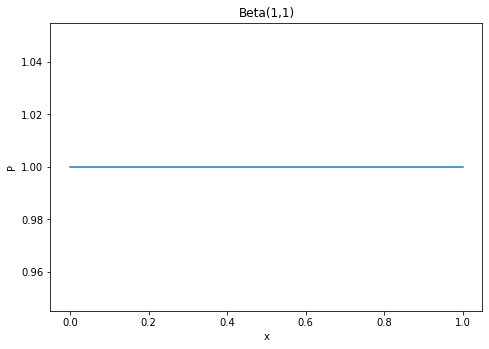

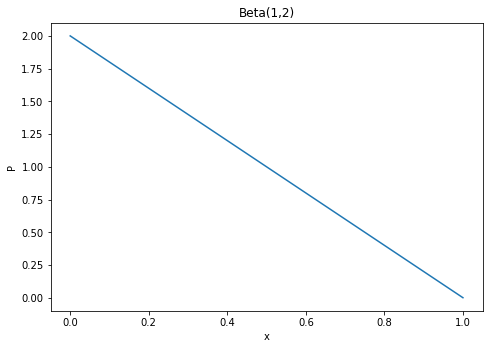

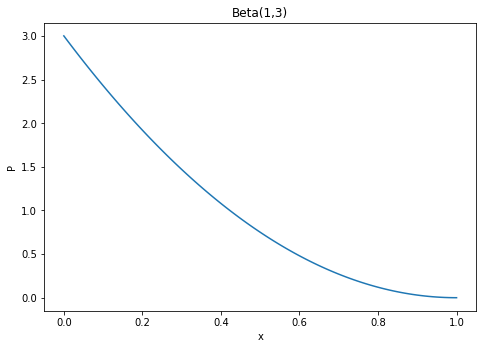

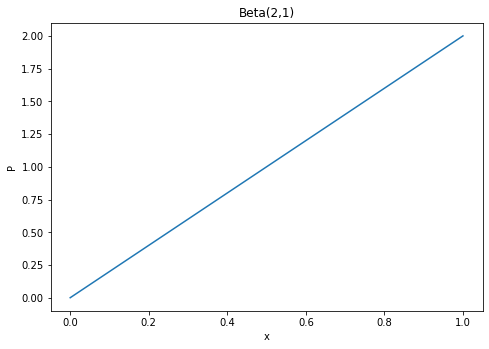

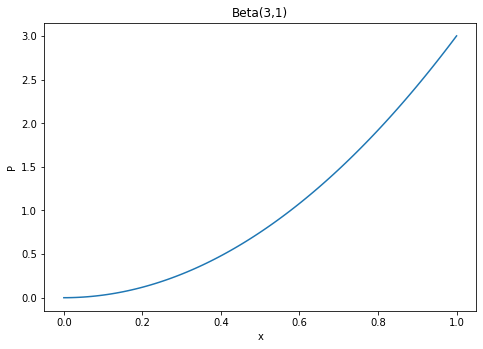

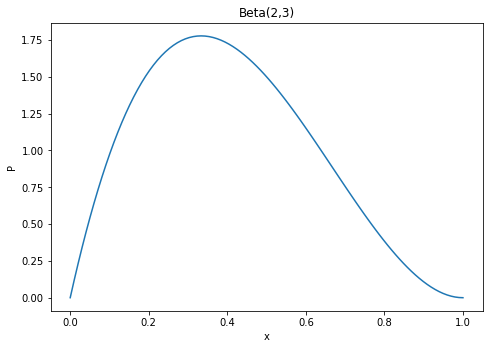

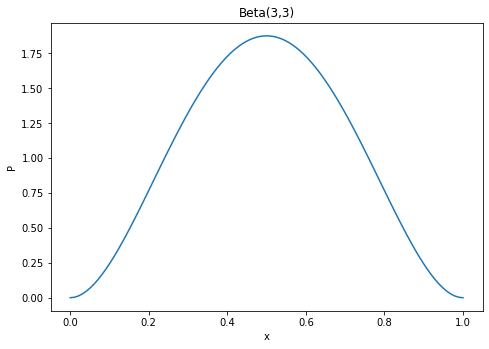

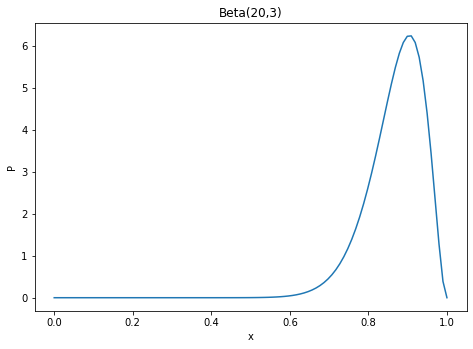

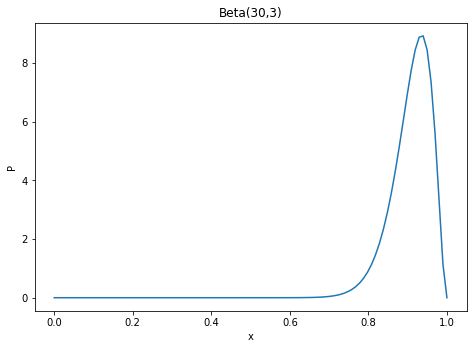

In [76]:
plotBeta(0.5,1)
plotBeta(0.5,0.5)
plotBeta(1,1)
plotBeta(1,2)
plotBeta(1,3)

plotBeta(2,1)
plotBeta(3,1)

plotBeta(2,3)
plotBeta(3,3)

plotBeta(20,3)
plotBeta(30,3)

## 2-Dimensional Beta Distribution

The Beta Distribution has equation
$$Beta(x;\alpha,\beta) = \frac{\Gamma{(\alpha + \beta)}}{\Gamma{(\alpha)}\Gamma{(\beta)}}x^{\alpha-1}(1-x)^{\beta-1}$$
Let $x=(x1,x2)$ where $x1 = x$ and $x2 = 1-x$. Then
$$Beta(x;\alpha,\beta) = \frac{\Gamma{(\alpha + \beta)}}{\Gamma{(\alpha)}\Gamma{(\beta)}}x1^{\alpha-1}x2^{\beta-1}$$


In [109]:
def Gamma(x):
    return(scipy.math.gamma(x))

def Beta2D(x,a):
    if sum(x)!=1 or (list(filter(lambda x: x < 0,x))):
        raise Exception('x is out of the support domain!')
    coef = Gamma(a[0]+a[1])/(Gamma(a[0])*Gamma(a[1]))
    return coef*x[0]**(a[0]-1)*x[1]**(a[1]-1)

Let's test it

In [110]:
# Set parameters
a = [1,1]
x = [0.8,0.2]

# The value of the pdf at x = 0.8
p1 = Beta2D(x,a)

print('If X ~ Beta({},{}), then P({}) = {}'.format(a[0],a[1],x,p1))

If X ~ Beta(1,1), then P([0.8, 0.2]) = 1.0


This is the extrapolation of the uniform distribution in 2-D. Note that this is still a line since we have 1 independent variable still.

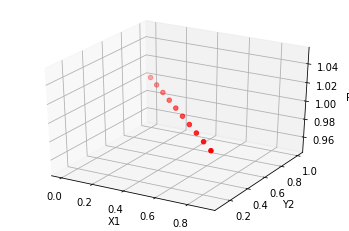

In [125]:
# Set parameters
a = [1,1]

# list of values from 0 to 1 in increments of 0.1
x1 = list(np.arange(0,1,0.1))

# list of values from 0 to 1 such that x2 + x1 = 1
x2 = list(map(lambda x: 1-x,x1))

# x is always a vector of x1 and x2. So the elements of x are [(0,1),(0.1,0.9),(0.2,0.8),...]
x = zip(x1,x2)

for i in x:
    p1 = Beta2D(i,a)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
ax.scatter(x1, x2, p1, c='r', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('P')

plt.show()
    

Let's introduce another dimension

In [135]:
def Beta3D(x,a):
    rounding_error = 0.000000001
    if (sum(x)>1+rounding_error) or (sum(x)<1-rounding_error) or (list(filter(lambda x: x < 0-rounding_error,x))):
        raise Exception('x is out of the support domain! x = {}'.format(x))
        
    coef = Gamma(a[0]+a[1]+a[2])/(Gamma(a[0])*Gamma(a[1])*Gamma(a[2]))
    return coef*x[0]**(a[0]-1)*x[1]**(a[1]-1)*x[2]**(a[2]-1)

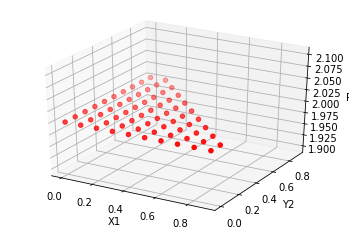

In [201]:
# Set parameters
a = [1,1,1]

# list of values from 0 to 1 in increments of 0.1
x1 = []
x2 = []
x3 = []

# create all possible points in the 3d space which results in x1+x2+x3=1
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        if i + j <= 1:
            x1.append(i)
            x2.append(j)
            x3.append(1-i-j)

# x is always a vector of x1 and x2. So the elements of x are [(0,1),(0.1,0.9),(0.2,0.8),...]
x = zip(x1,x2,x3)
p = []
for i in x:
    p.append(Beta3D(i,a))
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
# We are only going to visualise 2 of the 3 dimensions since this plane remains a plane in 
#3-dimensions (i.e. x3 is not free to vary)
ax.scatter(x1, x2, p, c='r', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('Y2')
ax.set_zlabel('P')

plt.show()

Let's make this into a function

In [190]:
def plotBeta3D(a,step=0.05):
    # list of values from 0 to 1 in increments of 0.1
    x1 = []
    x2 = []
    x3 = []

    # create all possible points in the 3d space which results in x1+x2+x3=1
    for i in np.arange(0,1,step):
        for j in np.arange(0,1,step):
            if i + j <= 1:
                x1.append(i)
                x2.append(j)
                x3.append(1-i-j)

    # x is always a vector of x1 and x2. So the elements of x are [(0,1),(0.1,0.9),(0.2,0.8),...]
    x = zip(x1,x2,x3)
    p=[]
    for i in x:
        p.append(Beta3D(i,a))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # We are only going to visualise 2 of the 3 dimensions since this plane remains a plane in 
    # 3-dimensions (i.e. x3 is not free to vary, it is fixed)
    # Note that you could equivalently view this as x2 is fixed and x1 and x3 are free to vary
    ax.scatter(x1, x2, p, c='r', marker='o')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('P')
    ax.set_title('Beta{}'.format(a))

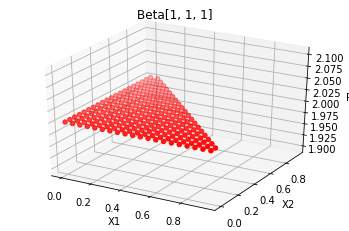

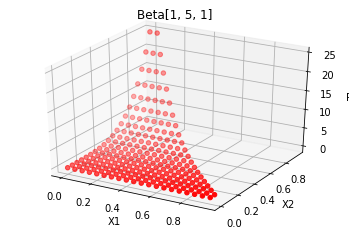

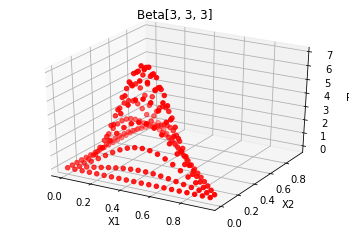

In [191]:
plotBeta3D(a=[1,1,1])
plotBeta3D(a=[1,5,1])
plotBeta3D(a=[3,3,3])


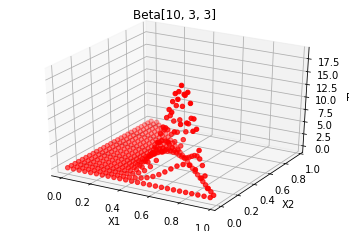

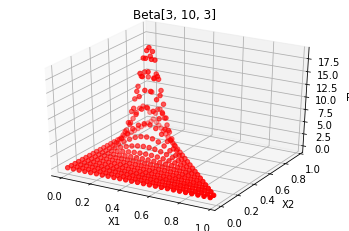

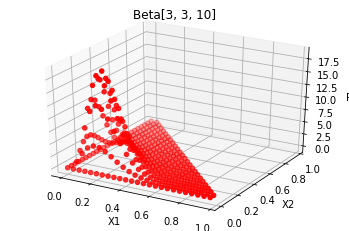

In [192]:
plotBeta3D(a=[10,3,3],step=0.04)
plotBeta3D(a=[3,10,3],step=0.04)
plotBeta3D(a=[3,3,10],step=0.04)

## Dirichlet Distribution

Let's get the probability of a point in 2-D using the Dirichlet pdf

In [199]:
def Dir(x,a):
    return stats.dirichlet.pdf(x,a)

In [200]:
print('Dir([1,0],[1,1]) = {}'.format(Dir([1,0],[1,1])))

Dir([1,0],[1,1]) = 1.0


This is expected since this is a uniform distribution. Let's plot it

In [251]:
def plotDir(a,type='2D',step=0.1):
    if type == '2D':
        # list of values from 0 to 1 in increments of 0.1
        x1 = list(np.arange(0,1,0.1))

        # list of values from 0 to 1 such that x2 + x1 = 1
        x2 = list(map(lambda x: 1-x,x1))

        # x is always a vector of x1 and x2. So the elements of x are [(0,1),(0.1,0.9),(0.2,0.8),...]
        x = zip(x1,x2)
        p = []
        for i in x:
            p.append(Dir(i,a))

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(x1, x2, p, c='r', marker='o')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('P') 
        ax.set_title('Dir({})'.format(a))
        
    if type == '3D':
        # list of values from 0 to 1 in increments of 0.1
        x1 = []
        x2 = []
        x3 = []

        # create all possible points in the 3d space which results in x1+x2+x3=1
        for i in np.arange(0,1,step):
            for j in np.arange(0,1,step):
                if i + j <= 1:
                    x1.append(round(i,5))
                    x2.append(round(j,5))
                    x3.append(round(1-i-j,5))

        # x is always a vector of x1 and x2. So the elements of x are [(0,1),(0.1,0.9),(0.2,0.8),...]
        x = zip(x1,x2,x3)
        p = []
        for i in x:
            p.append(Dir(i,a))

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(x1, x2, p, c='r', marker='o')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('P') 
        ax.set_title('Dir({})'.format(a))

The 2-D Dirichlet distribution is the same as our 2-D Beta distribution

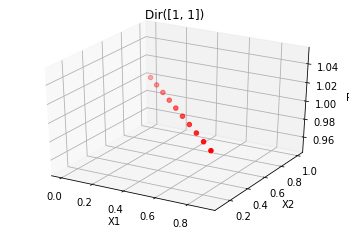

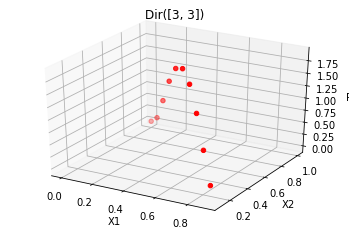

In [252]:
plotDir([1,1])

plotDir([3,3])

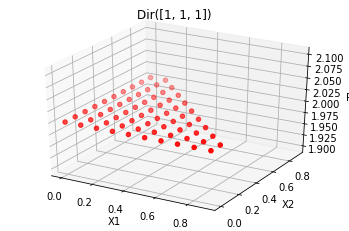

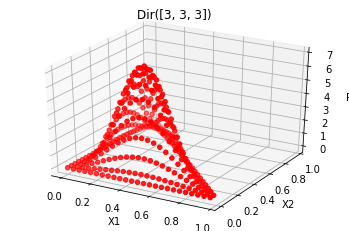

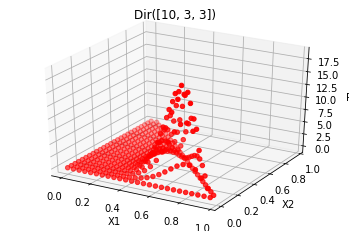

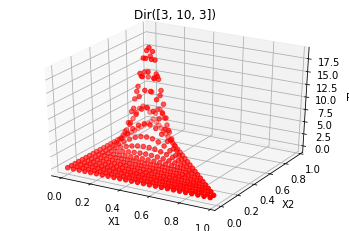

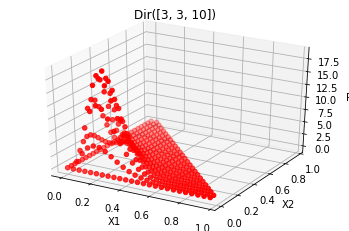

In [253]:
plotDir([1,1,1],type='3D')
plotDir([3,3,3],type='3D',step=0.04)
plotDir([10,3,3],type='3D',step=0.04)
plotDir([3,10,3],type='3D',step=0.04)
plotDir([3,3,10],type='3D',step=0.04)

Each point we gave to the Dirichlet distribution (and also the 2-D and 3-D Beta distributions), was a vector. So when we sample from a Dirichlet Distribution, we get a vector

In [221]:
v = stats.dirichlet.rvs(alpha = [1,1,1])
print('A random sample from the Dir(1,1,1) distribution gave a vector v={}'.format(*v))

A random sample from the Dir(1,1,1) distribution gave a vector v=[0.4239087  0.10387553 0.47221577]


Running multiple samples from a 3-D Dirichlet distribution, we expect to re-create the pdfs above

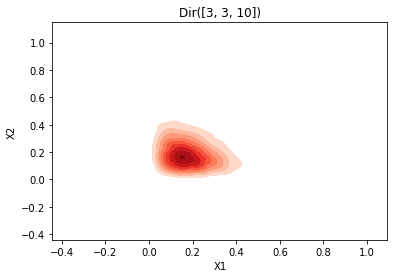

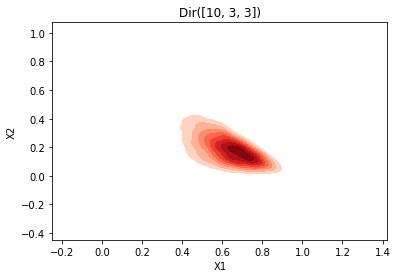

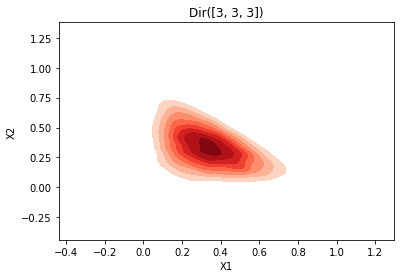

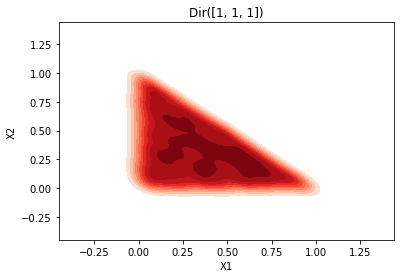

In [271]:
a = [3,3,10]

v = stats.dirichlet.rvs(alpha = a,size=10000)

# v is like v = array([1,2,3],[2,3,2],[5,5,4],...)
# Get the first column, the second column and the third column
x1 = v[:,0]
x2 = v[:,1]
x3 = v[:,2]

fig = plt.figure()
ax = sns.kdeplot(x1, x2, cmap="Reds", shade=True, bw=.15, shade_lowest=False)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
t = ax.set_title('Dir({})'.format(a))


######################################3



a = [10,3,3]

v = stats.dirichlet.rvs(alpha = a,size=10000)

# v is like v = array([1,2,3],[2,3,2],[5,5,4],...)
# Get the first column, the second column and the third column
x1 = v[:,0]
x2 = v[:,1]
x3 = v[:,2]

fig = plt.figure()
ax = sns.kdeplot(x1, x2, cmap="Reds", shade=True, bw=.15, shade_lowest=False)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
t = ax.set_title('Dir({})'.format(a))






######################################



a = [3,3,3]

v = stats.dirichlet.rvs(alpha = a,size=10000)

# v is like v = array([1,2,3],[2,3,2],[5,5,4],...)
# Get the first column, the second column and the third column
x1 = v[:,0]
x2 = v[:,1]
x3 = v[:,2]

fig = plt.figure()
ax = sns.kdeplot(x1, x2, cmap="Reds", shade=True, bw=.15, shade_lowest=False)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
t = ax.set_title('Dir({})'.format(a))



######################################



a = [1,1,1]

v = stats.dirichlet.rvs(alpha = a,size=10000)

# v is like v = array([1,2,3],[2,3,2],[5,5,4],...)
# Get the first column, the second column and the third column
x1 = v[:,0]
x2 = v[:,1]
x3 = v[:,2]

fig = plt.figure()
ax = sns.kdeplot(x1, x2, cmap="Reds", shade=True, bw=.15, shade_lowest=False)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
t = ax.set_title('Dir({})'.format(a))